In [28]:
import matplotlib as plt
import pandas 
import numpy
import sklearn
import seaborn as sns
import tpot
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier



from mpl_toolkits.mplot3d import Axes3D
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')


In this script, we will be using the mpl_toolkits library to visualize interactive 3D plots of the data.

In [3]:
orbits = pandas.read_csv('./data/orbits.csv')
print(orbits.head(n=10).to_string(index=False))
orbits.info()

    Object Name    Object Classification  Epoch (TDB)  Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  Aphelion Distance (AU)  Orbital Period (yr)  Minimum Orbit Intersection Distance (AU)  Orbital Reference  Asteroid Magnitude
       433 Eros            Amor Asteroid        57800           1.4579              0.2226                  10.8277                   178.8050              304.3265            319.3111                    1.1335                    1.78                 1.76                                    0.1492                598               11.16
     719 Albert            Amor Asteroid        57800           2.6385              0.5479                  11.5822                   156.1409              183.9204            224.5535                    1.1928                    4.08                 4.29                                    0.2004                 78          

In [4]:
impacts = pandas.read_csv('./data/impacts.csv')
print(impacts.head(n=10).to_string(index=False))
impacts.info()

Object Name  Period Start  Period End  Possible Impacts  Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude  Asteroid Diameter (km)  Cumulative Palermo Scale  Maximum Palermo Scale Maximum Torino Scale
   2006 WP1          2017        2017                 1                   5.200000e-09              17.77                28.3                   0.007                     -8.31                  -8.31                    0
    2013 YB          2017        2046                23                   7.600000e-05               8.98                31.4                   0.002                     -6.60                  -6.96                    0
    2008 US          2017        2062                30                   1.600000e-05              18.33                31.4                   0.002                     -6.48                  -6.87                    0
 2010 VR139          2017        2076                24                   2.000000e-07               4.99               

From here, we have imported our impacts and orbit data.

Text(0.5, 0.98, 'Pink is highly probable and Blue is not')

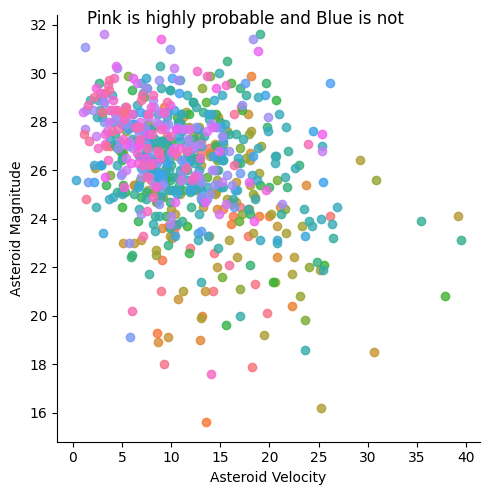

In [5]:
sns.lmplot(x='Asteroid Velocity', y='Asteroid Magnitude', hue='Cumulative Impact Probability',
           legend=False, data=impacts, fit_reg=False).fig.suptitle('Pink is highly probable and Blue is not')

In [6]:
dataframe = pandas.concat([impacts, orbits], axis=1, sort=False)
dataframe.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale', 'Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)',
       'Perihelion_Distance(AU)', 'Aphelion_Distance(AU)',
       'Orbital_Period(yr)', 'Minimum_Orbit_Intersection_Distance(AU)',
       'Orbital_Reference', 'Asteroid_Magnitude']
dataframe.head()

,Object_Name,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale,...,Orbit_Inclination(deg),Perihelion_Argument(deg),Node_Longitude(deg),Mean_Anomoly(deg),Perihelion_Distance(AU),Aphelion_Distance(AU),Orbital_Period(yr),Minimum_Orbit_Intersection_Distance(AU),Orbital_Reference,Asteroid_Magnitude
0,2006 WP1,2017.0,2017.0,1.0,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,...,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,2013 YB,2017.0,2046.0,23.0,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,...,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,2008 US,2017.0,2062.0,30.0,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,...,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,2010 VR139,2017.0,2076.0,24.0,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,...,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,2015 ME131,2017.0,2096.0,85.0,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,...,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [7]:
impacts.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale']
impacts.head()

,Object_Name,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale,Maximum_Torino_Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


From this scatter plot we can determine a range for impact probability using asteroid magnitude and asteroid velocity. Let's use TPOT to investigate the relationship between magnitude and velocity further:

In [8]:
impact_predication = impacts

# column only contains 0
impact_prediction = impact_predication.drop(['Object_Name','Maximum_Torino_Scale'], axis=1, inplace=True)


X = impact_predication
y = impact_predication['Possible_Impacts'].values

impact_predication.head(15)

,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale
0,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96
2,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87
3,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95
4,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30
5,2017,2110,55,2.800000e-07,5.98,22.5,0.110,-5.03,-5.51
6,2017,2111,123,9.000000e-07,8.79,24.1,0.052,-5.41,-6.42
7,2017,2111,514,1.900000e-06,4.49,26.2,0.020,-5.91,-7.58
8,2017,2112,350,1.800000e-05,2.04,28.5,0.007,-6.51,-7.54
9,2017,2112,187,7.900000e-08,17.02,26.9,0.014,-7.18,-7.97


We will split prediction data to train and test.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(impacts, impacts['Possible_Impacts'], test_size=0.50)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#model = tpot.TPOTClassifier(generations=5, population_size=20, cv=5,
                                    #random_state=42, verbosity=2)
#model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#model.export('test.py')

After running TPOT, the autoML suggested using a GaussianNB to visualize possible impacts.

In [16]:
# description of dataframe
X_train, X_test, y_train, y_test = train_test_split(impacts, impacts['Possible_Impacts'], test_size=0.50)

impact_predication.describe()

,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


Stochastic Gradient Descent

In [24]:
# scale data between (-1,1)
scaling = StandardScaler()
scaling.fit(X_train)
# transform data to scale
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

#Stochastic Gradient Descent
stochastic_gradient_descent = SGDRegressor()
stochastic_gradient_descent.fit(X_train, y_train)
stochastic_gradient_descent = stochastic_gradient_descent.predict(X_test)

Random Forest Regression

In [25]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
rmf = random_forest_regressor.predict(X_test)

print(random_forest_regressor.score(X_test, y_test))

0.9522397529870967


XGB Regression

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_prediction = model.predict(X_test)

accuracy = metrics.accuracy_score(model_prediction, y_test)
print("Decision Model Accuracy:", accuracy)


Decision Model Accuracy: 0.8011695906432749


AttributeError: module 'matplotlib' has no attribute 'gcf'

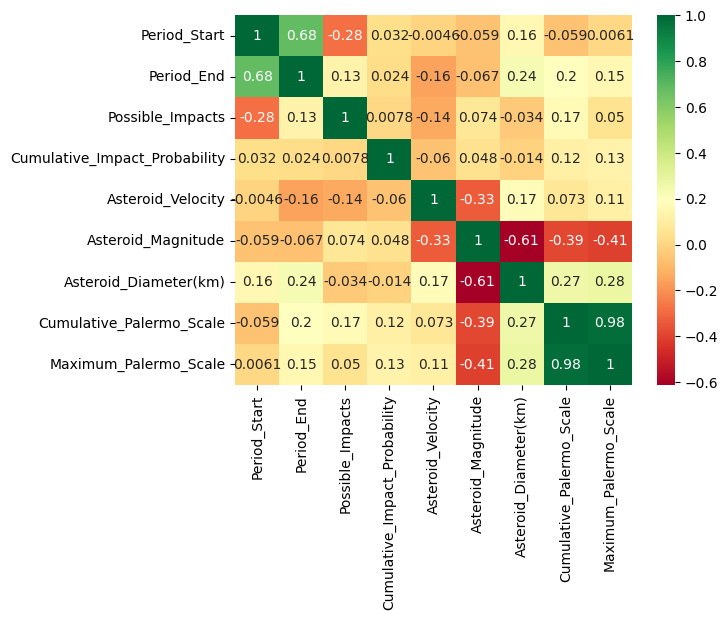

In [29]:
sns.heatmap(impacts[impacts.columns[:11]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()